<a href="https://colab.research.google.com/github/MMS-21/PortfolioProjects/blob/main/Movies_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries Needed

In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

IMPORTING THE DATA

In [ ]:
df = pd.read_csv('/content/movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


LOOKING FOR MISSING DATA

In [ ]:
for col in df.columns:
  pct_missing_data = np.mean(df[col].isnull())
  print(f'{col} --> {pct_missing_data * 100}%')

name --> 0.0%
rating --> 1.004173187271779%
genre --> 0.0%
year --> 0.0%
released --> 0.02608242044861763%
score --> 0.03912363067292645%
votes --> 0.03912363067292645%
director --> 0.0%
writer --> 0.03912363067292645%
star --> 0.013041210224308816%
country --> 0.03912363067292645%
budget --> 28.31246739697444%
gross --> 2.464788732394366%
company --> 0.2217005738132499%
runtime --> 0.05216484089723526%


Cleaning The Data

In [ ]:
df = df.dropna(axis=0)

In [ ]:
for col in df.columns:
  pct_missing_data = np.mean(df[col].isnull())
  print(f'{col} --> {pct_missing_data * 100}%')

name --> 0.0%
rating --> 0.0%
genre --> 0.0%
year --> 0.0%
released --> 0.0%
score --> 0.0%
votes --> 0.0%
director --> 0.0%
writer --> 0.0%
star --> 0.0%
country --> 0.0%
budget --> 0.0%
gross --> 0.0%
company --> 0.0%
runtime --> 0.0%


In [ ]:
df[['votes','budget','gross']] = df[['votes','budget','gross']].astype('int64')

In [ ]:
df['Year'] = df['released'].str.extract(r'(\d\d\d\d)',expand=True)

In [ ]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'Year'],
      dtype='object')

In [ ]:
data = df.drop(columns='year')

In [ ]:
data = data.sort_values(by=['gross'], inplace=False, ascending=False)
data.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


DROPPING DUPLICATES

In [ ]:
data['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

BULDING SCATTER PLOT BUDGET VS GROSS

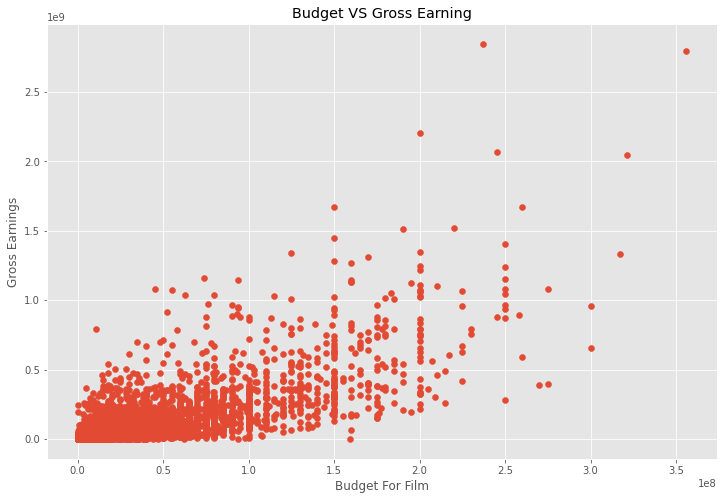

In [ ]:
plt.scatter(x=data['budget'],y=data['gross'])
plt.title('Budget VS Gross Earning')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

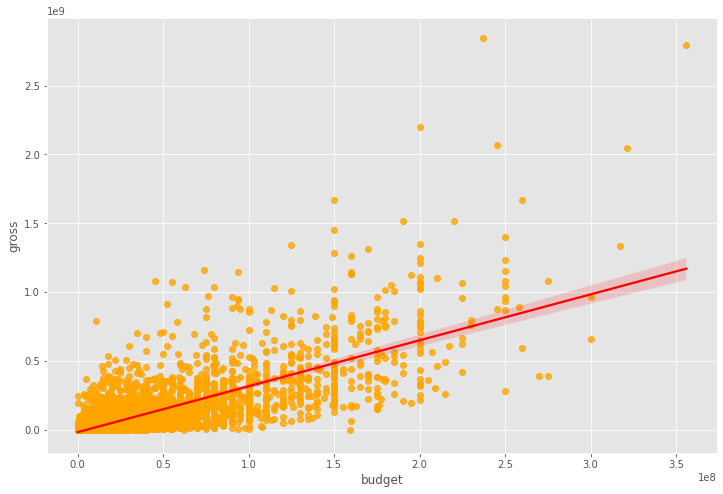

In [ ]:
sns.regplot(x="budget", y="gross", data=data, scatter_kws={'color':'orange'},line_kws={'color':'red'})

CORRELATION

In [50]:
data.corr(method='pearson') #pearson, Kndall, spearman

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


Correlation Matric for Numeric Features

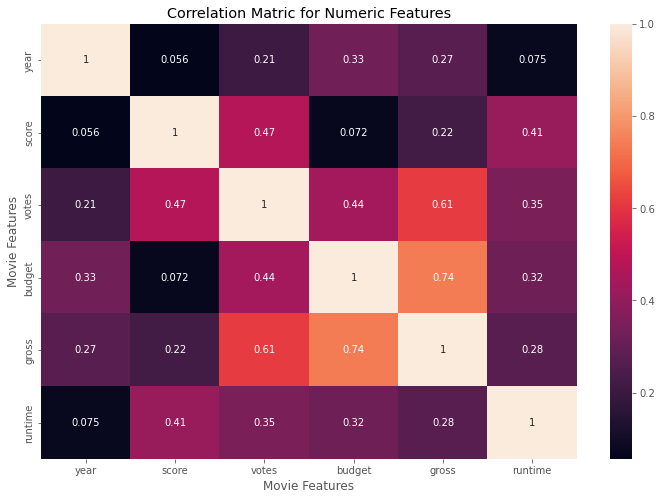

In [61]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [58]:
df_numerized = data

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,38


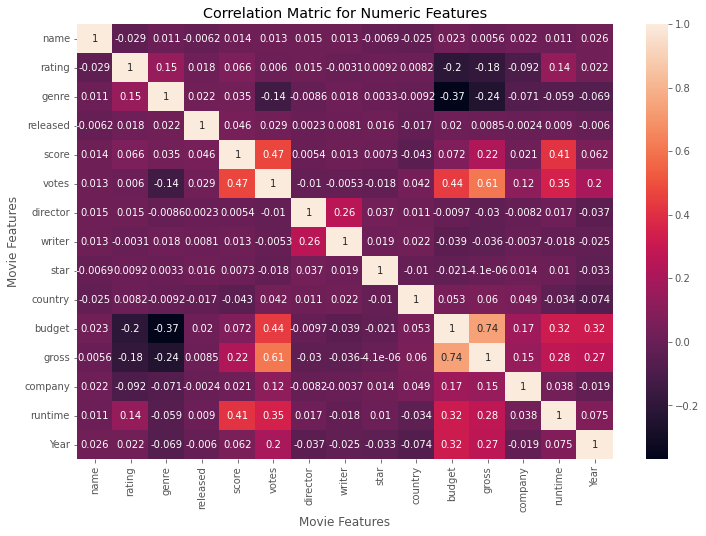

In [62]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [69]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
rating    budget     -0.203946
                        ...   
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
Length: 225, dtype: float64

In [70]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

score     runtime     0.414068
runtime   score       0.414068
budget    votes       0.439675
votes     budget      0.439675
          score       0.474256
score     votes       0.474256
votes     gross       0.614751
gross     votes       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64